In [2]:
import pandas as pd
import kagglehub
from kagglehub import KaggleDatasetAdapter
import matplotlib.pyplot as plt
from scipy.stats import ttest_ind
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

file_path = "iot_telemetry_data.csv"

df = kagglehub.load_dataset(
    KaggleDatasetAdapter.PANDAS,
    "garystafford/environmental-sensor-data-132k",
    file_path
)

/home/uta/Coding/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/tmp/ipykernel_37990/2674280979.py:12: DeprecationWarning: load_dataset is deprecated and will be removed in future version.
  df = kagglehub.load_dataset(


In [2]:
# Calculate mean, median and mode of humidity column
print("Mean Humidity:", df['humidity'].mean())
print("Median Humidity:", df['humidity'].median())
print("Mode Humidity:", df['humidity'].mode()[0])

Mean Humidity: 60.511693961575894
Median Humidity: 54.9
Mode Humidity: 51.7


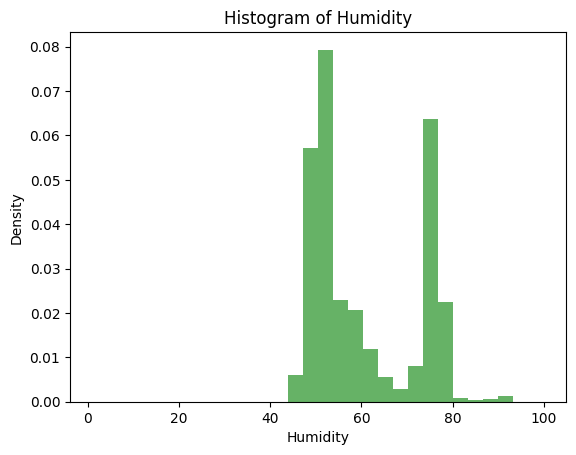

In [3]:
# Normal Dristribution of Humidity
plt.hist(df['humidity'], bins=30, density=True, alpha=0.6, color='g')
plt.xlabel('Humidity')
plt.ylabel('Density')
plt.title('Histogram of Humidity')
plt.show()

In [4]:
# Sample 100 data points from the temperature column
sample_quality = df['temp'].sample(n=100, random_state=1)
mean_quality_estimation = sample_quality.mean()
print("Mean quality estimation:", mean_quality_estimation)

Mean quality estimation: 22.407999996185303


In [5]:
# T-test
sample_high_quality = df[df['humidity'] > 60.51]['temp']
sample_low_quality = df[df['humidity'] <= 60.51]['temp']
stat, p = ttest_ind(sample_high_quality, sample_low_quality)
if p < 0.05:
    print("There is a significant difference between the two groups.")
else:
    print("There is no significant difference between the two groups.")

There is a significant difference between the two groups.


In [6]:
# Calculate Variance and Standard Deviation of Temperature
print("Temperature Varians:", df['temp'].var())
print("Temperature Standard Deviation:", df['temp'].std())

Temperature Varians: 7.281076269391815
Temperature Standard Deviation: 2.6983469512632756


Mean Squared Error: 41.90909867235849
R-squared: 0.6771402388135548


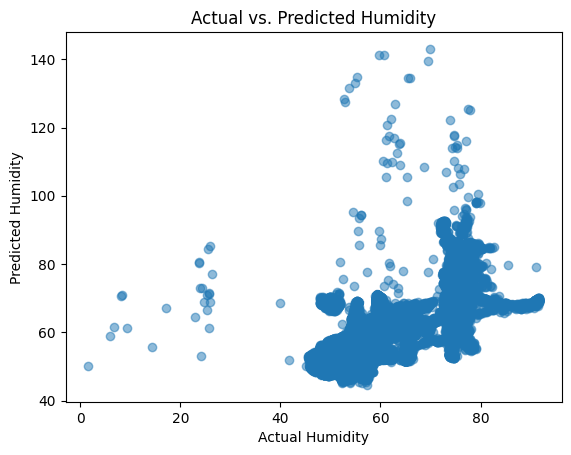

In [5]:
# Linear Regression
X = df.drop(['humidity', 'device'], axis=1)
y = df['humidity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Mean Squared Error:", mse)
print("R-squared:", r2)

plt.scatter(y_test, y_pred, alpha=0.5)
plt.xlabel("Actual Humidity")
plt.ylabel("Predicted Humidity")
plt.title("Actual vs. Predicted Humidity")
plt.show()